In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare, ks_2samp
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tel_41,tel_42,tel_43,tel_44,tel_45,tel_46,tel_47,tel_48,tel_49,diabetesMed
0,178974720,61754247,Caucasian,Male,[80-90),?,1,3,7,6,...,No,Steady,No,No,No,No,No,Ch,>30,1
1,111231666,110498427,AfricanAmerican,Female,[50-60),?,3,1,1,2,...,No,No,Steady,No,No,No,No,No,NO,1
2,134751624,91719990,Caucasian,Male,[80-90),?,1,1,7,5,...,No,Down,No,No,No,No,No,Ch,>30,1
3,254196636,1897758,Caucasian,Female,[70-80),?,3,1,1,3,...,No,Steady,No,No,No,No,No,Ch,>30,1
4,432617750,34636617,Asian,Female,[80-90),?,2,3,5,2,...,No,No,No,No,No,No,No,No,NO,1


In [3]:

for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 337
gender 0
age 0
weight 14315
tel_1 2458
tel_2 8122
tel_9 1
tel_10 33
tel_11 139
tel_13 0
tel_14 0
tel_15 0
tel_16 0
tel_17 0
tel_18 0
tel_19 0
tel_20 0
tel_21 0
tel_22 0
tel_23 0
tel_24 0
tel_25 0
tel_26 0
tel_27 0
tel_28 0
tel_29 0
tel_30 0
tel_41 0
tel_42 0
tel_43 0
tel_44 0
tel_45 0
tel_46 0
tel_47 0
tel_48 0
tel_49 0


In [4]:
#removing data with more no. of unknown values
df = df.drop(['weight','tel_1', 'tel_2'],axis=1)

In [5]:
drop_Idx = set(df[(df['tel_9'] == '?') & (df['tel_10'] == '?') & (df['tel_11'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['tel_9'][df['tel_9'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['tel_10'][df['tel_10'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['tel_11'][df['tel_11'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [6]:
#removing  columns since they contain only one category
df = df.drop(['tel_30', 'tel_41','tel_47','tel_20','tel_28','tel_29','tel_45','tel_46','tel_47'], axis = 1)

In [7]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
tel_9 0
tel_10 0
tel_11 0
tel_13 0
tel_14 0
tel_15 0
tel_16 0
tel_17 0
tel_18 0
tel_19 0
tel_21 0
tel_22 0
tel_23 0
tel_24 0
tel_25 0
tel_26 0
tel_27 0
tel_42 0
tel_43 0
tel_44 0
tel_48 0
tel_49 0


In [8]:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 0


In [9]:
#creating a list of categorical and numeric columns names
categorical=df.select_dtypes(include=['object'])
numeric=df.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'gender' 'age' 'tel_9' 'tel_10' 'tel_11' 'tel_13' 'tel_14'
 'tel_15' 'tel_16' 'tel_17' 'tel_18' 'tel_19' 'tel_21' 'tel_22' 'tel_23'
 'tel_24' 'tel_25' 'tel_26' 'tel_27' 'tel_42' 'tel_43' 'tel_44' 'tel_48'
 'tel_49']
['encounter_id' 'patient_id' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'tel_3' 'tel_4' 'tel_5' 'tel_6' 'tel_7' 'tel_8' 'tel_12' 'diabetesMed']


In [10]:
#printing the frequency count of all the categorical features
for col in categorical:
    print(categorical[col].value_counts())
    

Caucasian          10958
AfricanAmerican     2469
Hispanic             273
Other                212
Asian                 99
Name: race, dtype: int64
Female    7545
Male      6466
Name: gender, dtype: int64
[70-80)     3661
[60-70)     3184
[80-90)     2471
[50-60)     2290
[40-50)     1266
[30-40)      460
[90-100)     425
[20-30)      202
[10-20)       46
[0-10)         6
Name: age, dtype: int64
428       988
414       765
486       557
786       527
410       432
         ... 
136         1
250.43      1
706         1
223         1
362         1
Name: tel_9, Length: 502, dtype: int64
276      991
428      911
250      754
427      673
401      487
        ... 
323        1
E924       1
270        1
725        1
250.3      1
Name: tel_10, Length: 496, dtype: int64
250     1555
401     1090
276      761
428      678
427      531
        ... 
E943       1
555        1
E870       1
570        1
180        1
Name: tel_11, Length: 529, dtype: int64
None    13733
Norm      125
>300      10

In [11]:

#printing the frequency of all the numeric features
for col in numeric:
    print(numeric[col].value_counts())

113905662    1
400866194    1
219901818    1
138242124    1
241490862    1
            ..
143078892    1
222397704    1
135880056    1
110650854    1
281346048    1
Name: encounter_id, Length: 14011, dtype: int64
88785891     10
89308323      7
89472402      7
37096866      7
97019901      7
             ..
61041096      1
141390968     1
32397786      1
85019076      1
86261760      1
Name: patient_id, Length: 12396, dtype: int64
1    7655
3    2910
2    2541
5     444
6     403
8      53
4       3
7       2
Name: admission_type_id, dtype: int64
1     8521
3     2188
6     2051
22     378
2      315
4       87
23      84
13      84
7       82
5       77
14      65
28      26
15      18
24      13
25       7
9        6
18       5
8        3
19       1
Name: discharge_disposition_id, dtype: int64
7     8661
1     4415
17     363
4      242
6      163
5       88
2       56
3        6
9        6
10       3
22       2
8        2
14       1
20       1
11       1
25       1
Name: admission_s

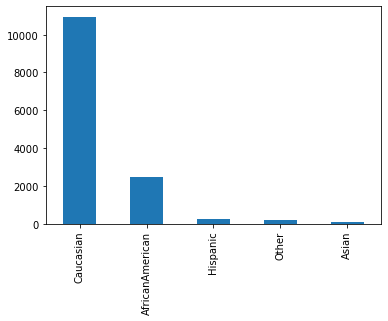

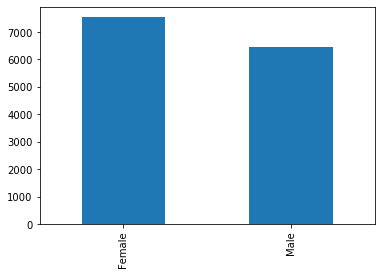

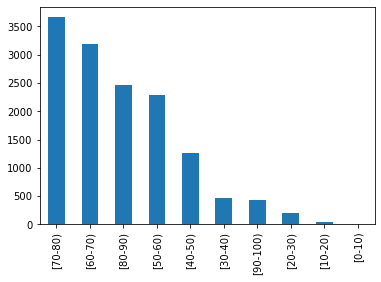

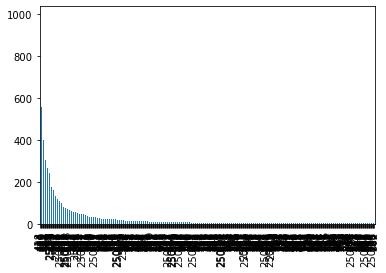

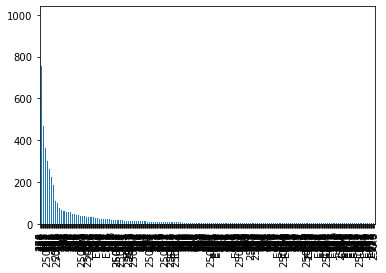

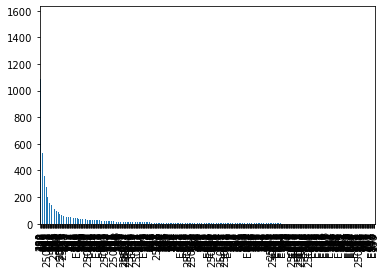

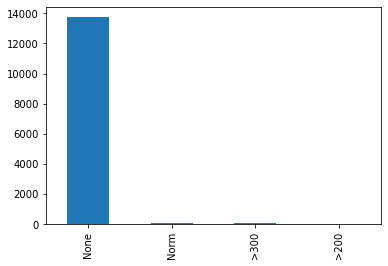

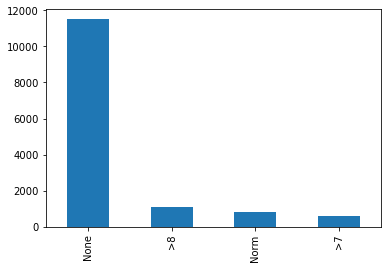

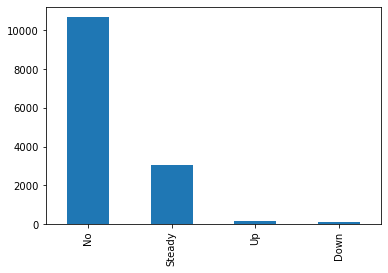

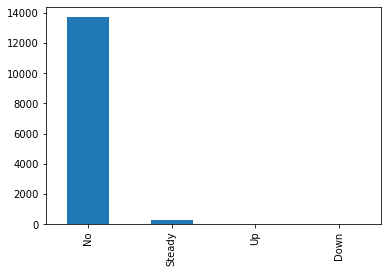

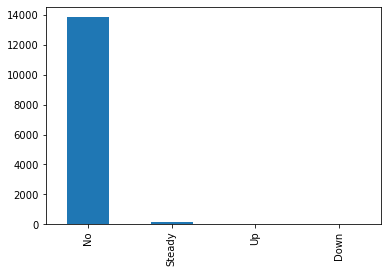

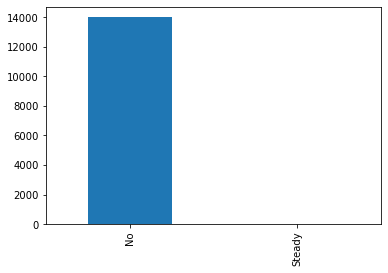

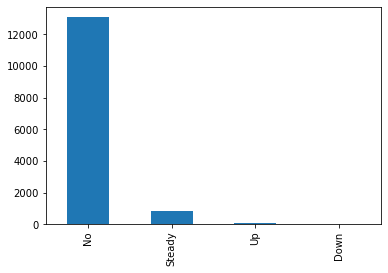

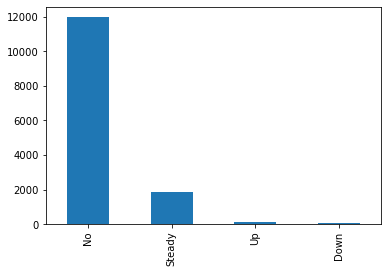

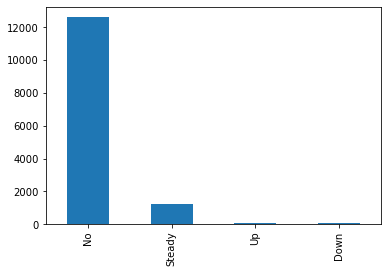

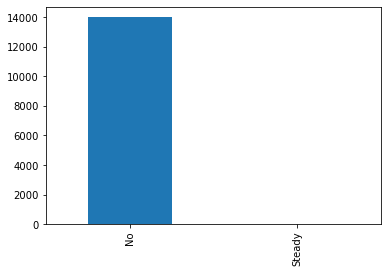

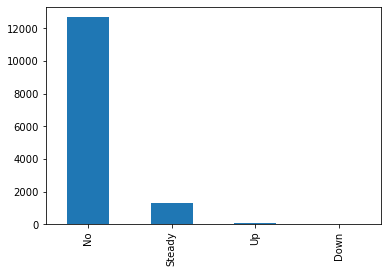

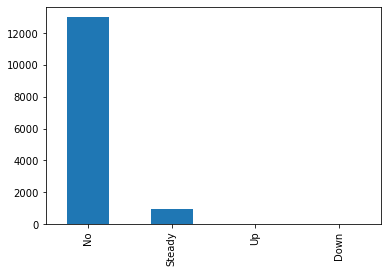

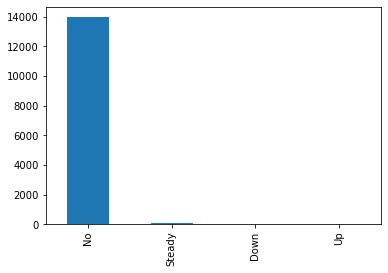

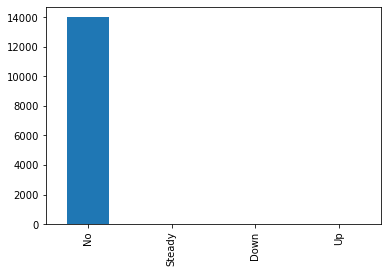

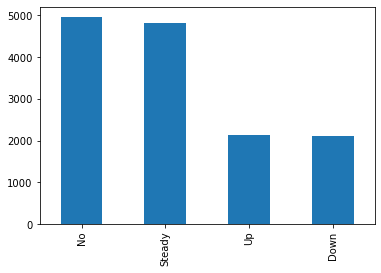

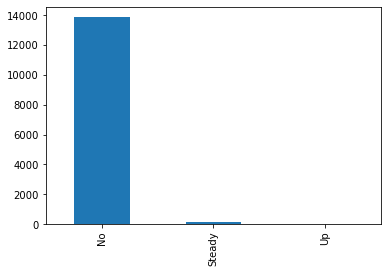

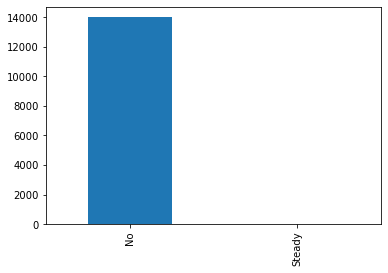

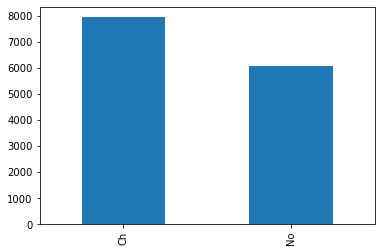

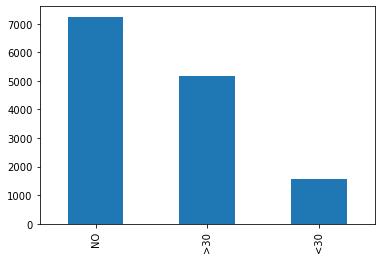

In [12]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()

In [13]:
#Making thevariables binary  
df['gender'] = df['gender'].apply(lambda x: 0 if x == "Female" else 1) 
df.shape

(14011, 39)

In [14]:


#defining a function to give average value for the age
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0



In [15]:
#replacing the age bins with their average value
df['age'] = df['age'].apply(lambda x: agecategory(x))

In [16]:
df['age'].unique()

array([ 0, 55, 75, 35, 65, 45, 15, 25,  5], dtype=int64)

In [17]:
#combing all variables tel_15 to tel_44 to one variable since they are all of similiar values describing similiar things (yes,no,steady)
indicators = ['tel_15', 'tel_16', 'tel_17', 'tel_18', 'tel_19', 'tel_21', 'tel_22',
       'tel_23', 'tel_24', 'tel_25', 'tel_26', 'tel_27', 'tel_42', 'tel_43',
       'tel_44']

In [18]:
print(indicators)

['tel_15', 'tel_16', 'tel_17', 'tel_18', 'tel_19', 'tel_21', 'tel_22', 'tel_23', 'tel_24', 'tel_25', 'tel_26', 'tel_27', 'tel_42', 'tel_43', 'tel_44']


In [19]:
#assigning a value of 0 if indicators are 'no' and assigning 1 even if indicators are
#increasing/decreasing/steady 
for i in indicators:
    df[i] = df[i].apply(lambda x: 0 if x == "No" else 1)

In [20]:
#finding out total number of treatments taken by patient
df['total_indicators'] = np.zeros((len(df['tel_15'])))
for col in indicators:
    df['total_indicators'] += df[col]

In [21]:
df['total_indicators'].unique()

array([2., 1., 0., 3., 4., 5., 6.])

In [22]:
#df1=df.groupby('diabetesMed').sum()
#df1

In [23]:
# converting remaining two anonymouns variables tel13 and 14 as categorical variables based on values
df['tel_13'] = df['tel_13'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
df['tel_14'] = df['tel_14'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

In [24]:
#defining a function to convert column tel 9,10,11 as categorical variables

def getCategory(x):
    if 'V' in str(x) or 'E' in str(x):
        return 0
    
    x = float(x)
    
    if (x >= 200 and x <= 300) or np.floor(x) == 785:
        return 1
    elif (x >= 300 and x <= 400) or np.floor(x) == 786:
        return 2
    elif (x >= 400 and x <= 500) or np.floor(x) == 787:
        return 3 
    elif x >= 500 and x <= 700:
        return 5
    elif x >= 700 and x <= 800:
        return 6
    elif (x >= 800 and x <= 900):
        return 7
    elif x >= 900 :
        return 8
    else:
        return 0

In [25]:
#changing the values into categories
df['tel_9_category'] = df['tel_9'].apply(lambda x: getCategory(x))
df['tel_10_category'] = df['tel_10'].apply(lambda x: getCategory(x))
df['tel_11_category'] = df['tel_11'].apply(lambda x: getCategory(x))

In [26]:
df['tel_11_category'].unique()

array([6, 3, 5, 1, 0, 8, 2, 7], dtype=int64)

In [27]:
list(df)

['encounter_id',
 'patient_id',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'tel_3',
 'tel_4',
 'tel_5',
 'tel_6',
 'tel_7',
 'tel_8',
 'tel_9',
 'tel_10',
 'tel_11',
 'tel_12',
 'tel_13',
 'tel_14',
 'tel_15',
 'tel_16',
 'tel_17',
 'tel_18',
 'tel_19',
 'tel_21',
 'tel_22',
 'tel_23',
 'tel_24',
 'tel_25',
 'tel_26',
 'tel_27',
 'tel_42',
 'tel_43',
 'tel_44',
 'tel_48',
 'tel_49',
 'diabetesMed',
 'total_indicators',
 'tel_9_category',
 'tel_10_category',
 'tel_11_category']

In [28]:
#Check for readmitted patients and remove all visits other than the 1st visit
patients = df['patient_id']
df[patients.isin(patients[patients.duplicated()])]

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_3,...,tel_42,tel_43,tel_44,tel_48,tel_49,diabetesMed,total_indicators,tel_9_category,tel_10_category,tel_11_category
5,139109832,24224814,AfricanAmerican,0,0,1,23,7,3,39,...,1,0,0,Ch,NO,1,2.0,3,3,1
13,158271282,38671362,Caucasian,0,55,5,6,1,8,61,...,1,0,0,Ch,>30,1,2.0,1,6,5
14,125289972,90043443,Caucasian,0,75,2,1,7,3,1,...,1,0,0,Ch,>30,1,3.0,5,5,1
16,125981694,24452838,AfricanAmerican,0,75,3,6,4,8,36,...,1,0,0,No,<30,1,1.0,3,6,3
18,193488420,30942189,Caucasian,0,55,3,1,1,1,3,...,1,0,0,Ch,>30,1,2.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14672,274832880,93233214,Caucasian,1,0,1,1,7,2,40,...,0,0,0,No,>30,1,1.0,3,1,5
14682,288998970,40852710,Caucasian,1,75,1,3,7,12,53,...,0,0,0,No,>30,1,1.0,5,3,1
14683,236142510,85335615,Caucasian,1,75,1,1,7,7,57,...,0,0,0,No,<30,0,0.0,5,1,3
14692,196987788,78710643,Caucasian,0,75,1,6,7,2,39,...,1,0,0,No,>30,1,1.0,5,3,3


In [29]:
df.shape

(14011, 43)

In [30]:


#dropping the patients encounters other than 1st visit
df = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
df.shape



(12396, 43)

In [31]:
# converting the admission_type_id, discharge_disposition_id, admission_source_id tel_9_category, tel_10_category,tel_11_category
# tel_13, tel_14 into categorical since the magnitudes does not have any intrinsic value
df['admission_type_id'] = df['admission_type_id'].astype('object')
df['admission_source_id'] = df['admission_source_id'].astype('object')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('object')
df['tel_9_category'] = df['tel_9_category'].astype('object')
df['tel_10_category'] = df['tel_10_category'].astype('object')
df['tel_11_category'] = df['tel_11_category'].astype('object')
df['tel_13'] = df['tel_13'].astype('object')
df['tel_14'] = df['tel_14'].astype('object')

In [32]:
df.head()

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_3,...,tel_42,tel_43,tel_44,tel_48,tel_49,diabetesMed,total_indicators,tel_9_category,tel_10_category,tel_11_category
0,178974720,61754247,Caucasian,1,0,1,3,7,6,61,...,1,0,0,Ch,>30,1,2.0,6,1,6
1,111231666,110498427,AfricanAmerican,0,55,3,1,1,2,32,...,0,1,0,No,NO,1,1.0,6,2,3
2,134751624,91719990,Caucasian,1,0,1,1,7,5,85,...,1,0,0,Ch,>30,1,1.0,3,0,5
3,254196636,1897758,Caucasian,0,75,3,1,1,3,24,...,1,0,0,Ch,>30,1,2.0,6,1,1
4,432617750,34636617,Asian,0,0,2,3,5,2,1,...,0,0,0,No,NO,1,1.0,6,6,1


In [33]:
delete_columns =['encounter_id','patient_id','admission_type_id','discharge_disposition_id','admission_source_id', 'tel_3', 'tel_4', 'tel_5', 'tel_6', 'tel_7',
       'tel_8', 'tel_9', 'tel_10', 'tel_11','tel_9_category', 'tel_10_category', 'tel_11_category', 'tel_15', 'tel_16', 'tel_17', 'tel_18', 'tel_19', 'tel_21', 'tel_22',
       'tel_23', 'tel_24', 'tel_25', 'tel_26', 'tel_27', 'tel_42', 'tel_43',
       'tel_44', 'tel_49']

In [34]:
#dropping the unnecessary columns
df.drop(delete_columns, inplace=True, axis=1)

In [35]:
df.head()

,race,gender,age,time_in_hospital,tel_12,tel_13,tel_14,tel_48,diabetesMed,total_indicators
0,Caucasian,1,0,6,5,0,0,Ch,1,2.0
1,AfricanAmerican,0,55,2,4,0,0,No,1,1.0
2,Caucasian,1,0,5,9,0,0,Ch,1,1.0
3,Caucasian,0,75,3,7,0,0,Ch,1,2.0
4,Asian,0,0,2,9,0,0,No,1,1.0


In [36]:
# converting tel48 as categorical variables based on values
df['tel_48'] = df['tel_48'].apply(lambda x: 0 if x == "No" else 1) 

In [37]:
df.head()

,race,gender,age,time_in_hospital,tel_12,tel_13,tel_14,tel_48,diabetesMed,total_indicators
0,Caucasian,1,0,6,5,0,0,1,1,2.0
1,AfricanAmerican,0,55,2,4,0,0,0,1,1.0
2,Caucasian,1,0,5,9,0,0,1,1,1.0
3,Caucasian,0,75,3,7,0,0,1,1,2.0
4,Asian,0,0,2,9,0,0,0,1,1.0


In [38]:
df.tel_14.unique()

array([0, 2, 1], dtype=object)

In [39]:
df['tel_48'] = df['tel_48'].astype('object')

In [40]:

from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
categorical=df.select_dtypes(include=['object'])
numeric=df.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'tel_13' 'tel_14' 'tel_48']
['gender' 'age' 'time_in_hospital' 'tel_12' 'diabetesMed'
 'total_indicators']


In [42]:
# creating dummies for all the categorical variables and deleting the original columns
nominal_columns = ['race', 'tel_13', 'tel_14', 'tel_48']
dummy_df = pd.get_dummies(df[nominal_columns])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(nominal_columns, axis=1)

In [49]:
df.head()

,gender,age,time_in_hospital,tel_12,diabetesMed,total_indicators,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,tel_13_0,tel_13_1,tel_13_2,tel_14_0,tel_14_1,tel_14_2,tel_48_0,tel_48_1
0,1,0,6,5,1,2.0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,0,55,2,4,1,1.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,0,5,9,1,1.0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,75,3,7,1,2.0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,0,0,2,9,1,1.0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [43]:
df1 = df

In [44]:


y = df1['diabetesMed']



In [45]:
X = df.drop('diabetesMed',axis=1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=64, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [50]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

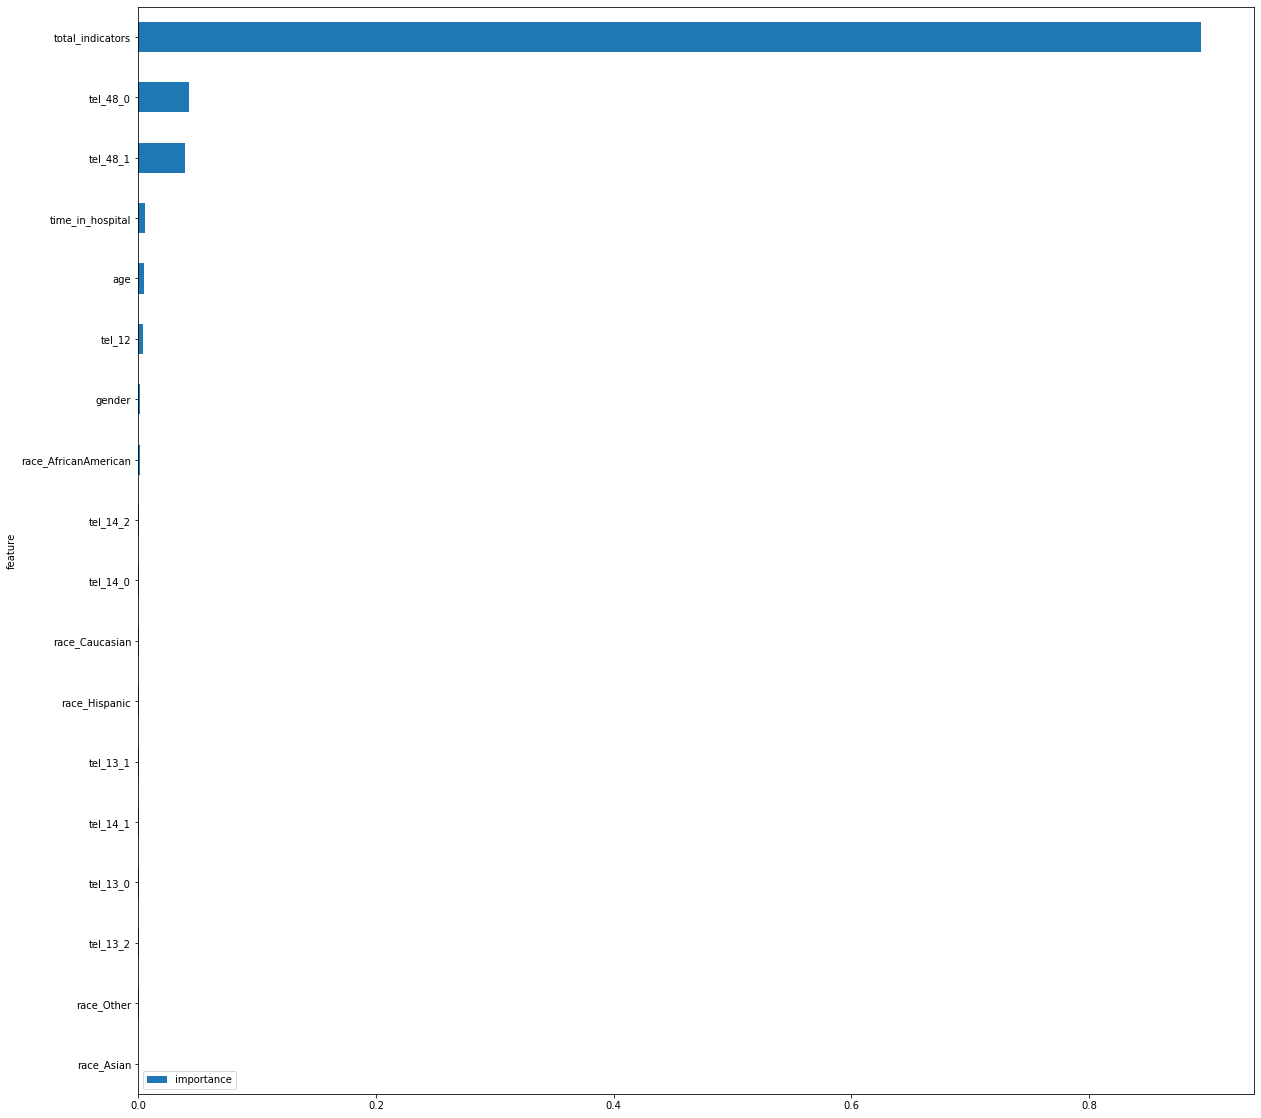

In [51]:
features.plot(kind='barh', figsize=(20, 20))

In [54]:
#deleting low important features
delete_features= ['gender', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other','tel_13_0', 'tel_13_1',
       'tel_13_2', 'tel_14_0', 'tel_14_1', 'tel_14_2']

In [56]:
df_final = df1.drop(delete_features, axis = 1)

In [57]:
df_final

,age,time_in_hospital,tel_12,diabetesMed,total_indicators,tel_48_0,tel_48_1
0,0,6,5,1,2.0,0,1
1,55,2,4,1,1.0,1,0
2,0,5,9,1,1.0,0,1
3,75,3,7,1,2.0,0,1
4,0,2,9,1,1.0,1,0
...,...,...,...,...,...,...,...
14689,55,1,9,0,0.0,1,0
14690,75,6,9,1,2.0,0,1
14691,75,2,8,1,2.0,0,1
14693,0,4,9,0,0.0,1,0


In [58]:
y = df_final['diabetesMed']

In [59]:
X = df_final.drop('diabetesMed',axis=1)

In [60]:


X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)



In [61]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

In [62]:
from sklearn.model_selection import cross_val_score

performance = []
for max_depth in [2,3,5,7,10]:
    dTree = DecisionTreeClassifier(criterion='entropy', class_weight = "balanced", max_depth=max_depth)
    performance.append((max_depth, np.mean(cross_val_score(dTree, X_train, Y_train, cv = 10, scoring = "f1_micro"))))

In [63]:
print(performance)
print("The best tree size is: ") 
str(sorted(performance, key = lambda x: x[1])[-1][0])

[(2, 1.0), (3, 1.0), (5, 1.0), (7, 1.0), (10, 1.0)]
The best tree size is: 


'10'

In [64]:
X_train

,age,time_in_hospital,tel_12,total_indicators,tel_48_0,tel_48_1
2373,0,2,5,1.0,1,0
8434,0,4,9,0.0,1,0
10796,25,4,9,1.0,1,0
8646,65,1,5,1.0,1,0
4130,45,2,3,1.0,1,0
...,...,...,...,...,...,...
14131,35,1,9,1.0,1,0
5757,45,2,8,3.0,0,1
5998,75,4,9,1.0,0,1
919,75,3,8,1.0,1,0


In [65]:
from sklearn.model_selection import cross_val_score, KFold

dTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth = 5)
kf = KFold(n_splits=10, shuffle=True, random_state=0)
dTree.fit(X_train, Y_train)

print("Test Results:")
y_prediction = dTree.predict(X_test)
print(classification_report(Y_test, y_prediction))

Test Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00      2228

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480



In [66]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

model = LogisticRegressionCV(Cs = 10, cv = 10, class_weight = "balanced")
model.fit(X_train_normal, Y_train)

LogisticRegressionCV(class_weight='balanced', cv=10)

In [67]:
y_prediction = model.predict(X_test_normal)
print(classification_report(y_prediction, Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00      2228

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480



In [77]:
#test dataset
dframe=pd.read_csv("test.csv",header=0,skiprows=0,engine='python')
ids = dframe['encounter_id']
dframe[ids.isin(ids[ids.duplicated()])]
dframe = dframe.replace('?', np.NaN )
dframe = dframe.replace('Unknown/Invalid', np.NaN )

In [78]:
dframe.drop(['weight','tel_1', 'tel_2'],axis=1,inplace=True)
dframe.drop(['tel_30', 'tel_41','tel_47','tel_20','tel_28','tel_29','tel_45','tel_46','tel_47'], axis = 1,inplace=True)
dframe['gender'] = dframe['gender'].apply(lambda x: 0 if x == "Female" else 1) 
drop_Idx = set(dframe[(dframe['tel_9'] == '?') & (dframe['tel_10'] == '?') & (dframe['tel_11'] == '?')].index)

drop_Idx = drop_Idx.union(set(dframe['tel_9'][dframe['tel_9'] == '?'].index))
drop_Idx = drop_Idx.union(set(dframe['tel_10'][dframe['tel_10'] == '?'].index))
drop_Idx = drop_Idx.union(set(dframe['tel_11'][dframe['tel_11'] == '?'].index))
drop_Idx = drop_Idx.union(set(dframe['race'][dframe['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(dframe[dframe['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(dframe['gender'][dframe['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(dframe.index) - set(drop_Idx))
dframe = dframe.iloc[new_Idx]
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0
dframe['age'] = dframe['age'].apply(lambda x: agecategory(x))
indicators = ['tel_15', 'tel_16', 'tel_17', 'tel_18', 'tel_19', 'tel_21', 'tel_22',
       'tel_23', 'tel_24', 'tel_25', 'tel_26', 'tel_27', 'tel_42', 'tel_43',
       'tel_44']
for i in indicators:
    dframe[i] = dframe[i].apply(lambda x: 0 if x == "No" else 1)
dframe['total_indicators'] = np.zeros((len(dframe['tel_15'])))
for col in indicators:
    dframe['total_indicators'] += dframe[col]
dframe['tel_13'] = dframe['tel_13'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
dframe['tel_14'] = dframe['tel_14'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
dframe['tel_48'] = dframe['tel_48'].apply(lambda x: 0 if x == "No" else 1) 
patients = dframe['patient_id']
dframe[patients.isin(patients[patients.duplicated()])]
dframe = dframe.drop_duplicates(subset= ['patient_id'], keep = 'first')
dframe['admission_type_id'] = dframe['admission_type_id'].astype('object')
dframe['admission_source_id'] = dframe['admission_source_id'].astype('object')
dframe['discharge_disposition_id'] = dframe['discharge_disposition_id'].astype('object')
dframe['tel_48'] = dframe['tel_48'].astype('object')
dframe['tel_13'] = dframe['tel_13'].astype('object')
dframe['tel_14'] = dframe['tel_14'].astype('object')
delete_columns =['patient_id','admission_type_id','discharge_disposition_id','admission_source_id', 'tel_3', 'tel_4', 'tel_5', 'tel_6', 'tel_7',
       'tel_8', 'tel_9', 'tel_10', 'tel_11', 'tel_15', 'tel_16', 'tel_17', 'tel_18', 'tel_19', 'tel_21', 'tel_22',
       'tel_23', 'tel_24', 'tel_25', 'tel_26', 'tel_27', 'tel_42', 'tel_43',
       'tel_44', 'tel_49']
dframe.drop(delete_columns, inplace=True, axis=1)
categorical=dframe.select_dtypes(include=['object'])
numeric=dframe.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)
nominal_columns = ['race', 'tel_13', 'tel_14', 'tel_48']
dummy_dframe = pd.get_dummies(dframe[nominal_columns])
dframe = pd.concat([dframe, dummy_dframe], axis=1)
dframe = dframe.drop(nominal_columns, axis=1)
delete_features= ['gender', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other','tel_13_0', 'tel_13_1',
       'tel_13_2', 'tel_14_0', 'tel_14_1', 'tel_14_2']
dframe = dframe.drop(delete_features, axis = 1)




['race' 'tel_13' 'tel_14' 'tel_48']
['encounter_id' 'gender' 'age' 'time_in_hospital' 'tel_12'
 'total_indicators']


In [79]:
dframe[0:3]

,encounter_id,age,time_in_hospital,tel_12,total_indicators,tel_48_0,tel_48_1
0,97074168,65,4,7,1.0,1,0
1,38255910,65,4,4,2.0,0,1
2,36573714,75,3,7,0.0,1,0


In [80]:
dfnew= dframe.iloc[:,1:7]

In [81]:
#predicting using Decision Tree Classifier
y_prediction_DTC = dTree.predict(dfnew[1:])

In [82]:
dfnew = dfnew.reset_index(drop=True)

In [83]:
print(dfnew.isnull().sum())

age                 0
time_in_hospital    0
tel_12              0
total_indicators    0
tel_48_0            0
tel_48_1            0
dtype: int64


In [84]:
#predicting using logistic regression classifier
data2_scalar = scaler.fit_transform(dfnew)
y_prediction_LRC = model.predict(data2_scalar)

In [85]:
predicted_probability = model.predict_proba(data2_scalar)

In [86]:
predicted_probability = pd.DataFrame(predicted_probability)

In [87]:
dframe['y_prediction_LRC'] = pd.DataFrame(y_prediction_LRC)

In [88]:
dframe['y_prediction_DTC'] = pd.DataFrame(y_prediction_DTC)[0]

In [89]:
dframe['predicted_probability_LR_0'] = pd.DataFrame(predicted_probability)[0]

In [90]:
dframe['predicted_probability_LR_1'] = pd.DataFrame(predicted_probability)[1]

In [91]:
predicted_probability_decisiontree = dTree.predict_proba(dfnew)
dframe['predicted_probability_decisiontree_0'] = pd.DataFrame(predicted_probability_decisiontree)[0]
dframe['predicted_probability_decisiontree_1'] = pd.DataFrame(predicted_probability_decisiontree)[1]

In [92]:
dframe

,encounter_id,age,time_in_hospital,tel_12,total_indicators,tel_48_0,tel_48_1,y_prediction_LRC,y_prediction_DTC,predicted_probability_LR_0,predicted_probability_LR_1,predicted_probability_decisiontree_0,predicted_probability_decisiontree_1
0,97074168,65,4,7,1.0,1,0,1.0,1.0,0.024166,0.975834,0.0,1.0
1,38255910,65,4,4,2.0,0,1,1.0,0.0,0.000089,0.999911,0.0,1.0
2,36573714,75,3,7,0.0,1,0,1.0,1.0,0.423356,0.576644,1.0,0.0
3,73972230,65,14,9,3.0,0,1,1.0,0.0,0.000003,0.999997,0.0,1.0
5,89493114,0,8,5,0.0,1,0,1.0,0.0,0.407156,0.592844,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,86452692,65,3,9,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
7965,86749284,65,8,5,2.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
7966,135741342,65,5,5,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
7967,65660634,65,1,5,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:


prediction=dframe[['encounter_id','y_prediction_DTC']]



In [101]:
prediction

,encounter_id,y_prediction_DTC
0,97074168,1.0
1,38255910,0.0
2,36573714,1.0
3,73972230,0.0
5,89493114,0.0
...,...,...
7964,86452692,NaN
7965,86749284,NaN
7966,135741342,NaN
7967,65660634,NaN


In [102]:
prediction.to_csv("prediction.csv")